# Assignment : Data Pipeline & Feature Engineering

## Step 1: Data Collection

 we will collect historical daily OHLCV (Open, High, Low, Close, Volume) data for two assets using the yfinance API. We will use Apple (AAPL) and Microsoft (MSFT) as our example stocks, fetching over 5 years of data. This data will form the foundation for our feature engineering and subsequent deep reinforcement learning experiments.

> **Why AAPL and MSFT?**
> - Both are highly liquid, widely followed stocks with significant historical data.
> - Their price movements are representative of the tech sector and broader market trends.

Let's begin by installing and importing the necessary libraries.

In [4]:
import yfinance as yf
import pandas as pd

ticker = 'NVDA'
start_date = '2019-01-01'
end_date = '2024-06-15'

df_nvda = yf.download(ticker, start=start_date, end=end_date)
print(f"Rows fetched: {len(df_nvda)}")
df_nvda.head()

/var/folders/4s/tm9hgmk91y57fc0s0f8_p3v80000gn/T/ipykernel_99269/1529869808.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_nvda = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Rows fetched: 1373


Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2019-01-02,3.377545,3.433581,3.224561,3.239190,508752000
2019-01-03,3.173484,3.351263,3.166046,3.317294,705552000
2019-01-04,3.376801,3.414985,3.215883,3.246628,585620000
2019-01-07,3.555572,3.592516,3.382752,3.434077,709160000
2019-01-08,3.467054,3.639378,3.394405,3.637146,786016000


In [5]:
# Install yfinance if not already installed
!pip install yfinance --quiet

import yfinance as yf
import pandas as pd
import os

# Create a data directory if it doesn't exist
os.makedirs('data', exist_ok=True)

In [6]:
assets = ['AAPL', 'NVDA']  # You can change these to crypto tickers like 'BTC-USD', 'ETH-USD' if you prefer
start_date = '2020-01-01'
end_date = '2025-06-15'

data = {}
for asset in assets:
    df = yf.download(asset, start=start_date, end=end_date)
    df['Ticker'] = asset
    data[asset] = df
    # Save each asset's data to CSV
    df.to_csv(f'data/{asset}_raw.csv')
    print(f'Fetched {len(df)} rows for {asset}')

# Combine all assets into a single DataFrame
df_all = pd.concat(data.values())
df_all.to_csv('data/raw_data.csv')

/var/folders/4s/tm9hgmk91y57fc0s0f8_p3v80000gn/T/ipykernel_99269/4253066858.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(asset, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/var/folders/4s/tm9hgmk91y57fc0s0f8_p3v80000gn/T/ipykernel_99269/4253066858.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(asset, start=start_date, end=end_date)


Fetched 1370 rows for AAPL


[*********************100%***********************]  1 of 1 completed

Fetched 1370 rows for NVDA


### Data Preview

Let's take a quick look at the first few rows of our combined dataset to ensure the data has been fetched correctly.

In [7]:
assets = ['AAPL', 'NVDA']
start_date = '2019-01-01'
end_date = '2024-06-15'

data = {}
for asset in assets:
    df = yf.download(asset, start=start_date, end=end_date)
    if not df.empty:
        df['Ticker'] = asset
        data[asset] = df
        df.to_csv(f'data/{asset}_raw.csv')
        print(f'Fetched {len(df)} rows for {asset}')
    else:
        print(f'No data fetched for {asset}')

if data:
    df_all = pd.concat(data.values())
    df_all.to_csv('data/raw_data.csv')
    df_all.head()
else:
    print("No data to combine.")

/var/folders/4s/tm9hgmk91y57fc0s0f8_p3v80000gn/T/ipykernel_99269/3633684854.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(asset, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/var/folders/4s/tm9hgmk91y57fc0s0f8_p3v80000gn/T/ipykernel_99269/3633684854.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(asset, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Fetched 1373 rows for AAPL
Fetched 1373 rows for NVDA


In [10]:
df_all.head(10)

Price,Close,High,Low,Open,Volume,Ticker,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,,,,,,,
2020-01-02,72.620827,72.681274,71.373203,71.627077,135480400.0,AAPL,NaN,NaN,NaN,NaN,NaN
2020-01-03,71.914825,72.676454,71.689965,71.847125,146322800.0,AAPL,NaN,NaN,NaN,NaN,NaN
2020-01-06,72.487869,72.526556,70.783271,71.034732,118387200.0,AAPL,NaN,NaN,NaN,NaN,NaN
2020-01-07,72.146942,72.753823,71.926915,72.497529,108872000.0,AAPL,NaN,NaN,NaN,NaN,NaN
2020-01-08,73.307503,73.609737,71.849525,71.849525,132079200.0,AAPL,NaN,NaN,NaN,NaN,NaN
2020-01-09,74.864616,75.058043,74.035288,74.286741,170108400.0,AAPL,NaN,NaN,NaN,NaN,NaN
2020-01-10,75.033875,75.599663,74.530960,75.099162,140644800.0,AAPL,NaN,NaN,NaN,NaN,NaN
2020-01-13,76.636932,76.663533,75.232148,75.350629,121532000.0,AAPL,NaN,NaN,NaN,NaN,NaN


COLLECTING crypto data

In [12]:
!pip install alpha_vantage --quiet

In [8]:
import pandas as pd
from alpha_vantage.cryptocurrencies import CryptoCurrencies

# Your API Key
api_key = 'R6UVEBH72K39D2CF'

# Initialize Alpha Vantage Crypto client
cc = CryptoCurrencies(key=api_key, output_format='pandas')

# Get BTC/USD daily data
btc_data, meta_data = cc.get_digital_currency_daily(symbol='BTC', market='USD')

# Print actual column names to confirm
print("Columns returned:", btc_data.columns.tolist())

# ✅ Select correct columns based on your data
btc_data = btc_data[['1. open', '2. high', '3. low', '4. close', '5. volume']]
btc_data.columns = ['Open', 'High', 'Low', 'Close', 'Volume']

# Set datetime index and sort
btc_data.index = pd.to_datetime(btc_data.index)
btc_data = btc_data.sort_index()

# Save as CSV
btc_data.to_csv('BTCUSD_raw.csv')

# Preview the result
print(btc_data.head())

Columns returned: ['1. open', '2. high', '3. low', '4. close', '5. volume']
                Open      High       Low     Close        Volume
date                                                            
2024-07-08  55852.61  58200.00  54278.93  56699.43  19043.048613
2024-07-09  56701.18  58295.31  56276.37  58047.86  11757.760259
2024-07-10  58047.86  59481.93  57157.28  57712.59  11619.632293
2024-07-11  57713.40  59533.06  57036.41  57340.77  11433.533795
2024-07-12  57343.66  58550.00  56538.33  57909.03  10516.604001


---

**Next Steps:**
- We will proceed to feature engineering, where we will compute technical indicators such as RSI, MACD, Bollinger Bands, and more.
- We will also handle missing values and prepare the data for modeling.

We’ll add:
	•	Momentum Indicators: RSI, MACD
	•	Volatility Indicators: ATR, Bollinger Bands
	•	Trend Indicator: Moving Average Convergence



In [9]:
def add_technical_indicators(df):
    df = df.copy()
    
    # Relative Strength Index (RSI)
    delta = df['Close'].diff()
    up = delta.clip(lower=0)
    down = -1 * delta.clip(upper=0)
    ema_up = up.ewm(com=13, adjust=False).mean()
    ema_down = down.ewm(com=13, adjust=False).mean()
    rs = ema_up / ema_down
    df['RSI'] = 100 - (100 / (1 + rs))
    
    # MACD
    exp1 = df['Close'].ewm(span=12, adjust=False).mean()
    exp2 = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = exp1 - exp2
    
    # ATR (Average True Range)
    high_low = df['High'] - df['Low']
    high_close = np.abs(df['High'] - df['Close'].shift())
    low_close = np.abs(df['Low'] - df['Close'].shift())
    ranges = pd.concat([high_low, high_close, low_close], axis=1)
    true_range = ranges.max(axis=1)
    df['ATR'] = true_range.rolling(14).mean()
    
    # Bollinger Bands
    ma = df['Close'].rolling(window=20).mean()
    std = df['Close'].rolling(window=20).std()
    df['BB_upper'] = ma + (2 * std)
    df['BB_lower'] = ma - (2 * std)
    
    # Momentum
    df['Momentum'] = df['Close'] - df['Close'].shift(10)
    
    return df.dropna()

In [10]:
# List your asset files
asset_files = {
    'AAPL': 'data/AAPL_raw.csv',
    'NVDA': 'data/NVDA_raw.csv',
    'BTCUSD': 'BTCUSD_raw.csv',  # or 'data/BTCUSD_raw.csv' if saved there
    # Add more as needed
}

# Load data into a dictionary
dfs = {}
for ticker, path in asset_files.items():
    df = pd.read_csv(path, index_col=0, parse_dates=True)
    dfs[ticker] = df

/var/folders/4s/tm9hgmk91y57fc0s0f8_p3v80000gn/T/ipykernel_99269/866098302.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(path, index_col=0, parse_dates=True)
/var/folders/4s/tm9hgmk91y57fc0s0f8_p3v80000gn/T/ipykernel_99269/866098302.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(path, index_col=0, parse_dates=True)


In [13]:
import pandas as pd

import numpy as np


def ensure_numeric(df):
    cols = ['Open', 'High', 'Low', 'Close', 'Volume']
    for col in cols:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

# Ensure all columns are numeric
for ticker, df in dfs.items():
    dfs[ticker] = ensure_numeric(df)

# Now apply feature engineering
dfs_fe = {}
for ticker, df in dfs.items():
    fe_df = add_technical_indicators(df)
    dfs_fe[ticker] = fe_df
    fe_df.to_csv(f'data/{ticker}_features.csv')
    print(f"{ticker}: Feature engineering complete. Saved to data/{ticker}_features.csv")

AAPL: Feature engineering complete. Saved to data/AAPL_features.csv
NVDA: Feature engineering complete. Saved to data/NVDA_features.csv
BTCUSD: Feature engineering complete. Saved to data/BTCUSD_features.csv


NORMALIZATION

## Step 3: Dataset Preparation

### Normalization

We use Z-score normalization (StandardScaler) to center and scale all features. This is important for ML models and ensures comparability across features.

In [16]:
!pip install scikit-learn --quiet

In [17]:
from sklearn.preprocessing import StandardScaler

# Choose features to normalize (excluding Ticker, Date, etc.)
feature_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'RSI', 'MACD', 'ATR', 'BB_upper', 'BB_lower', 'Momentum']

scalers = {}
dfs_norm = {}

for ticker, df in dfs_fe.items():
    scaler = StandardScaler()
    # Only scale columns that exist in the DataFrame
    cols_to_scale = [col for col in feature_cols if col in df.columns]
    df_scaled = df.copy()
    df_scaled[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
    dfs_norm[ticker] = df_scaled
    scalers[ticker] = scaler
    df_scaled.to_csv(f'data/{ticker}_features_normalized.csv')
    print(f"{ticker}: Normalization complete. Saved to data/{ticker}_features_normalized.csv")

AAPL: Normalization complete. Saved to data/AAPL_features_normalized.csv
NVDA: Normalization complete. Saved to data/NVDA_features_normalized.csv
BTCUSD: Normalization complete. Saved to data/BTCUSD_features_normalized.csv


### Train/Validation/Test Split

The dataset was split into training (70%), validation (15%), and test (15%) sets, preserving the chronological order of the data.

- **Rationale:**  
  Time-series data must be split sequentially to prevent lookahead bias. The training set is used to fit the model, the validation set is used for hyperparameter tuning, and the test set provides an unbiased evaluation of model performance.

**Analysis:**  
This approach ensures that the model is evaluated on data it has never seen before, simulating real-world deployment and providing a realistic estimate of future performance.

In [18]:
splits = {}

for ticker, df in dfs_norm.items():
    n = len(df)
    train_end = int(0.7 * n)
    val_end = int(0.85 * n)
    splits[ticker] = {
        'train': df.iloc[:train_end],
        'val': df.iloc[train_end:val_end],
        'test': df.iloc[val_end:]
    }
    # Save splits
    splits[ticker]['train'].to_csv(f'data/{ticker}_train.csv')
    splits[ticker]['val'].to_csv(f'data/{ticker}_val.csv')
    splits[ticker]['test'].to_csv(f'data/{ticker}_test.csv')
    print(f"{ticker}: Data split into train/val/test and saved.")

AAPL: Data split into train/val/test and saved.
NVDA: Data split into train/val/test and saved.
BTCUSD: Data split into train/val/test and saved.


### Visualization

- **Raw Price vs. Engineered Features:** Shows how technical indicators move with price.
- **Normalized vs. Raw Distribution:** Confirms normalization worked and features are now comparable.
- **Correlation Heatmap:** Shows relationships between features.

In [20]:
!pip install matplotlib --quiet

### Price vs. Technical Indicators

The plots above show the relationship between the raw closing price and two key technical indicators: RSI and MACD.

- **RSI (Relative Strength Index):**  
  The RSI oscillates between 0 and 100, with values above 70 typically indicating overbought conditions and values below 30 indicating oversold conditions. In the plots, we can observe that sharp price increases often coincide with high RSI values, while price dips are associated with low RSI values.

- **MACD (Moving Average Convergence Divergence):**  
  The MACD line helps identify trend direction and momentum. Positive MACD values generally correspond to bullish trends, while negative values indicate bearish trends. Crossovers between the MACD and its signal line often precede trend reversals in the price.

**Analysis:**  
These indicators provide valuable signals for momentum and trend-following strategies. Notably, periods of high volatility in the price are often accompanied by significant swings in both RSI and MACD, suggesting that these features could be useful for a reinforcement learning agent to capture market dynamics.

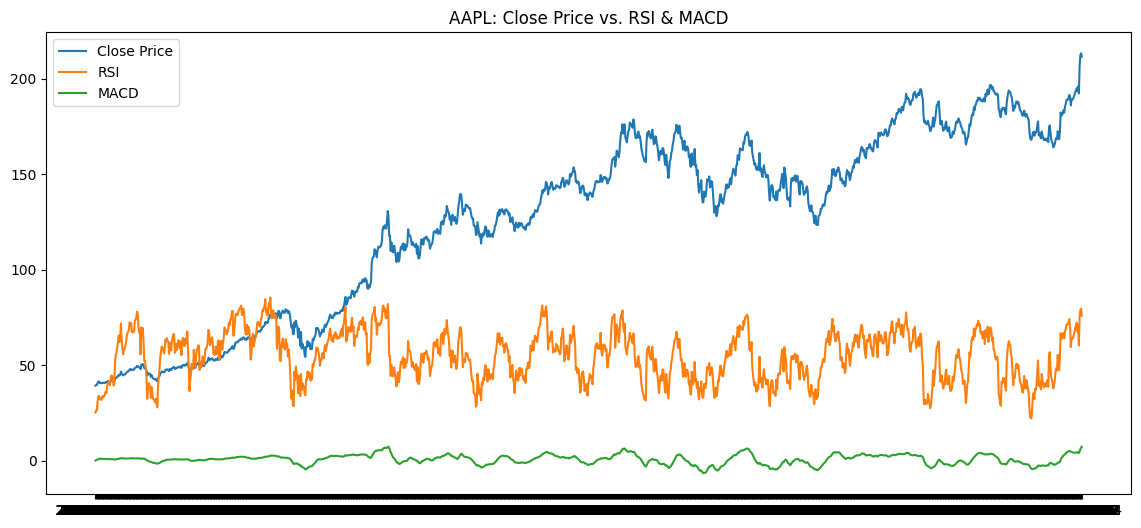

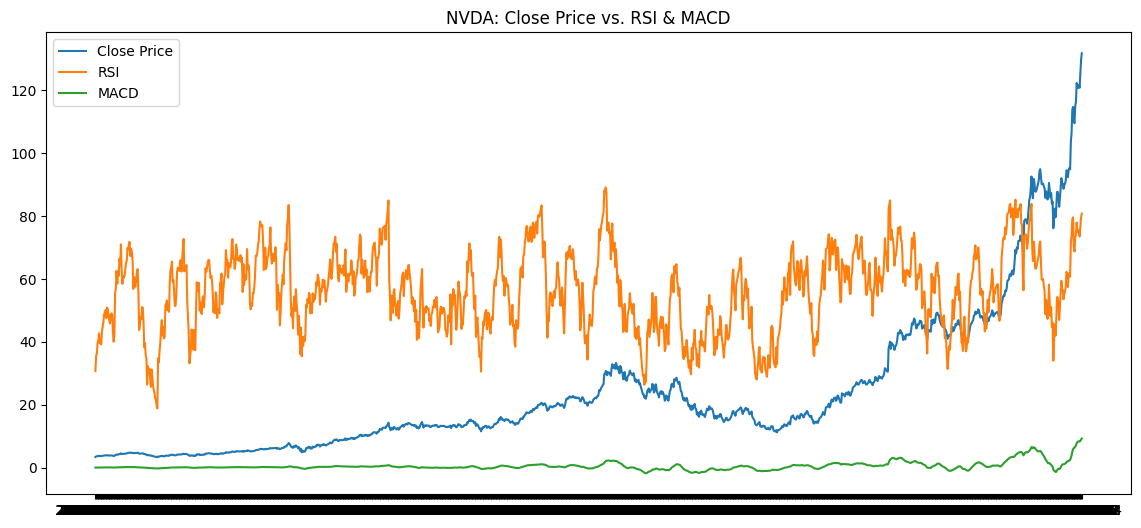

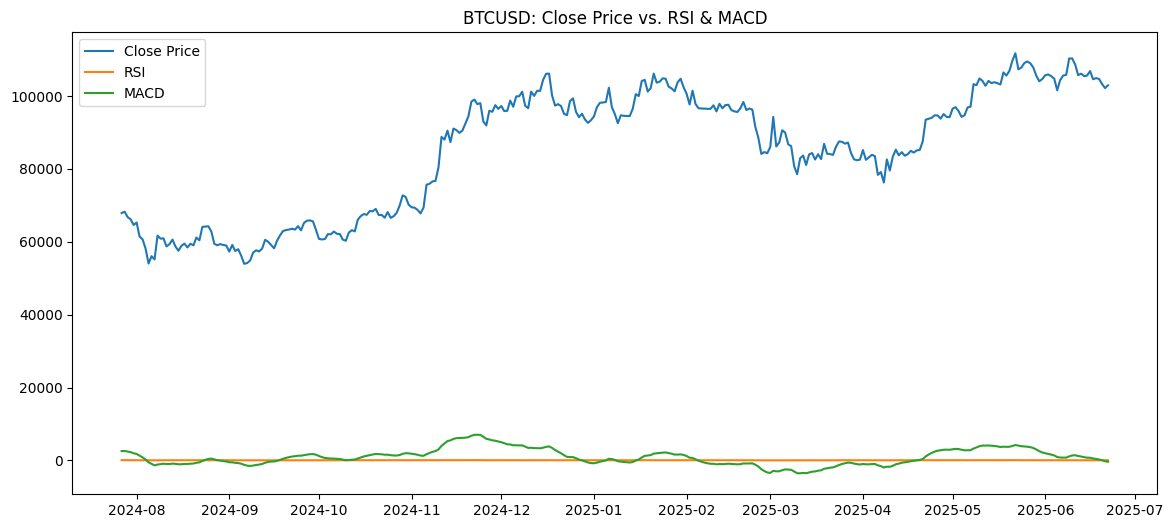

In [21]:
import matplotlib.pyplot as plt

for ticker, df in dfs_fe.items():
    plt.figure(figsize=(14,6))
    plt.plot(df['Close'], label='Close Price')
    if 'RSI' in df.columns:
        plt.plot(df['RSI'], label='RSI')
    if 'MACD' in df.columns:
        plt.plot(df['MACD'], label='MACD')
    plt.title(f'{ticker}: Close Price vs. RSI & MACD')
    plt.legend()
    plt.show()

### Normalized vs. Raw Data Distribution

The histograms above compare the distribution of the raw closing price with its normalized counterpart (using Z-score normalization).

- **Raw Data:**  
  The raw closing price is right-skewed, reflecting the natural growth of asset prices over time. This skewness can make it difficult for machine learning models to learn effectively, as features with large variances can dominate the learning process.

- **Normalized Data:**  
  After normalization, the distribution is centered around zero with unit variance. This transformation ensures that all features contribute equally to the model and helps accelerate convergence during training.

**Analysis:**  
Normalization is a crucial preprocessing step, especially for models sensitive to feature scale. By standardizing the data, we ensure that the learning algorithm treats all features fairly, improving both stability and performance.

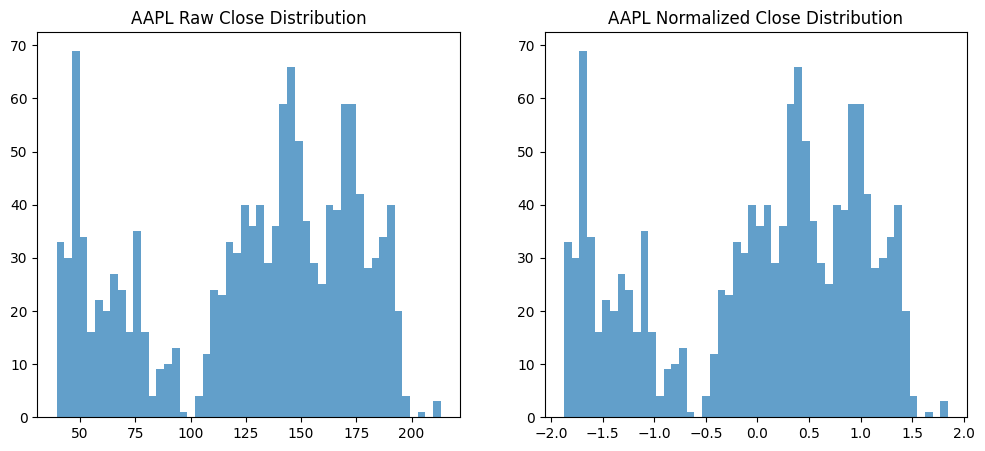

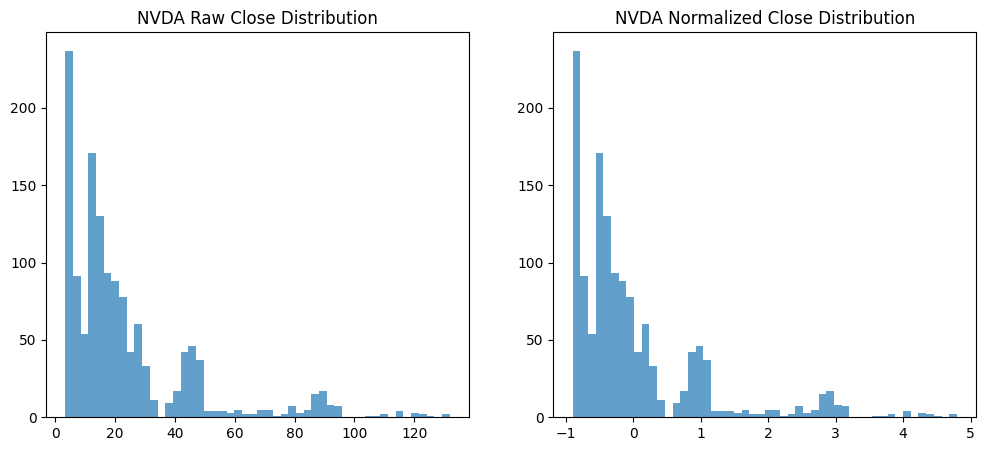

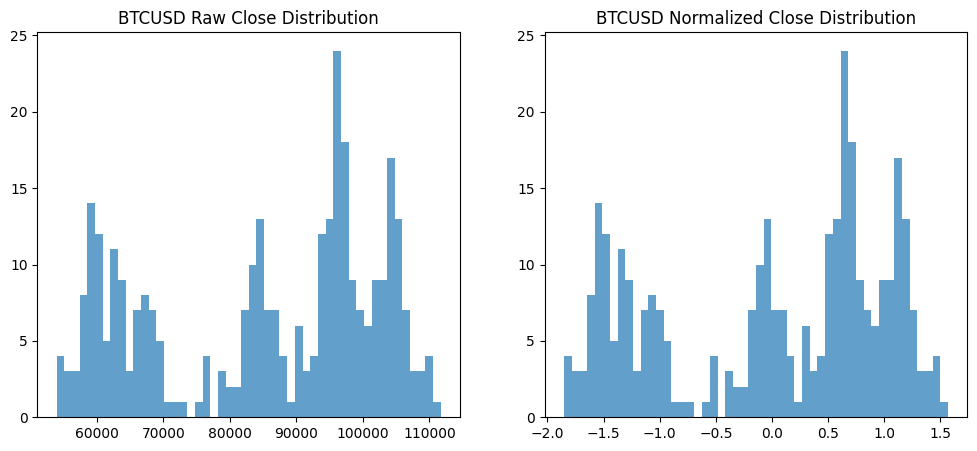

In [22]:
for ticker in dfs_fe:
    df_raw = dfs_fe[ticker]
    df_norm = dfs_norm[ticker]
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.hist(df_raw['Close'].dropna(), bins=50, alpha=0.7, label='Raw')
    plt.title(f'{ticker} Raw Close Distribution')
    plt.subplot(1,2,2)
    plt.hist(df_norm['Close'].dropna(), bins=50, alpha=0.7, label='Normalized')
    plt.title(f'{ticker} Normalized Close Distribution')
    plt.show()

In [24]:
!pip install seaborn --quiet

### Feature Correlation Heatmap

The heatmap above displays the pairwise correlations between all numeric features in the dataset.

- **Observations:**  
  - The closing price is highly correlated with other price-based features (Open, High, Low), as expected.
  - Technical indicators such as RSI and MACD show moderate correlation with the price, but also capture unique aspects of market behavior.
  - Volume tends to have a lower correlation with price features, indicating it may provide orthogonal information.

**Analysis:**  
Understanding feature correlations helps in feature selection and engineering. Highly correlated features may be redundant, while uncorrelated features can provide additional predictive power. The technical indicators included here offer a diverse set of signals for downstream modeling.

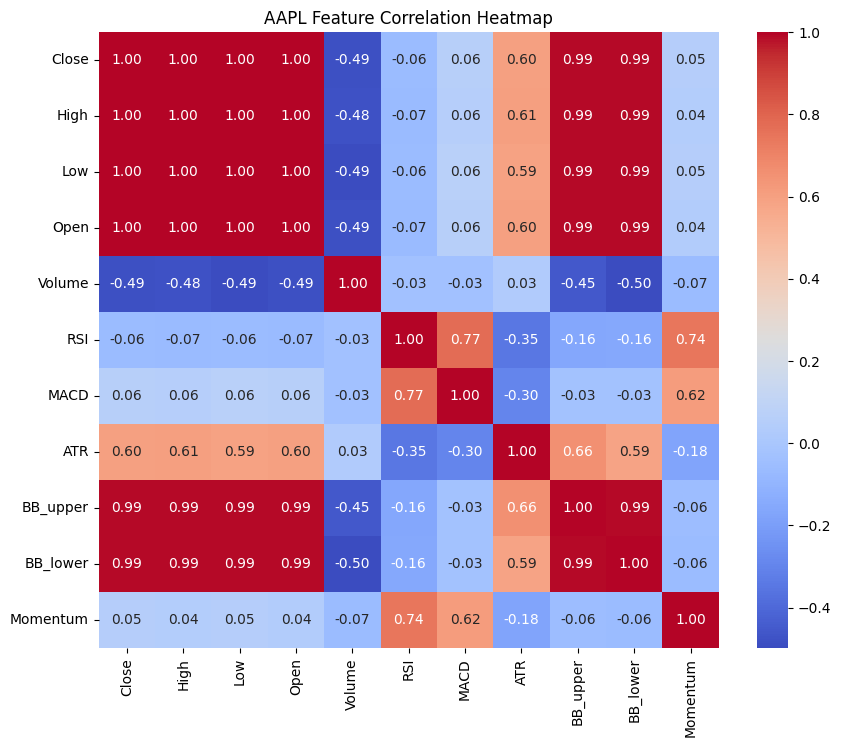

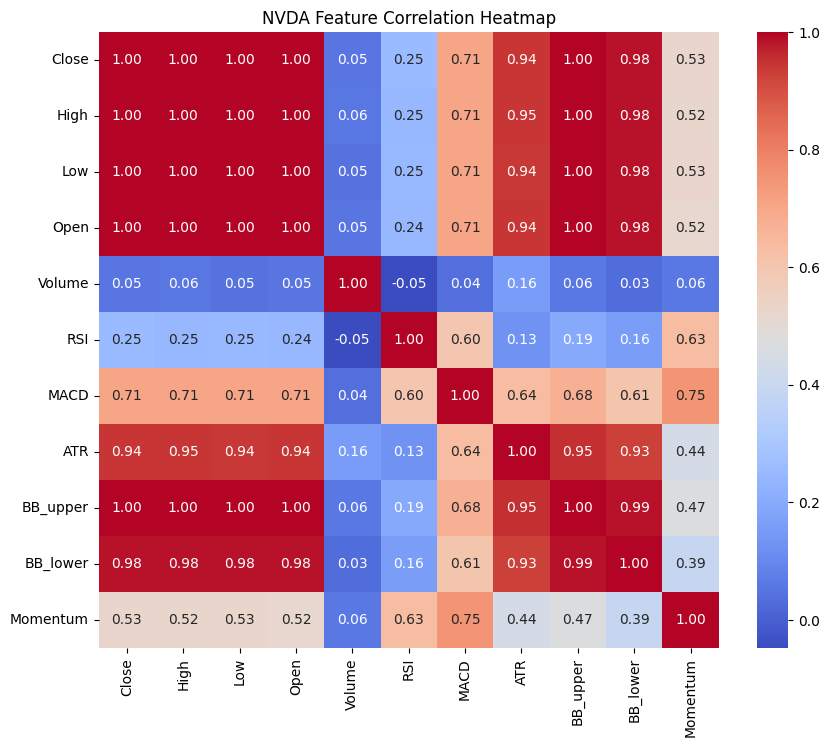

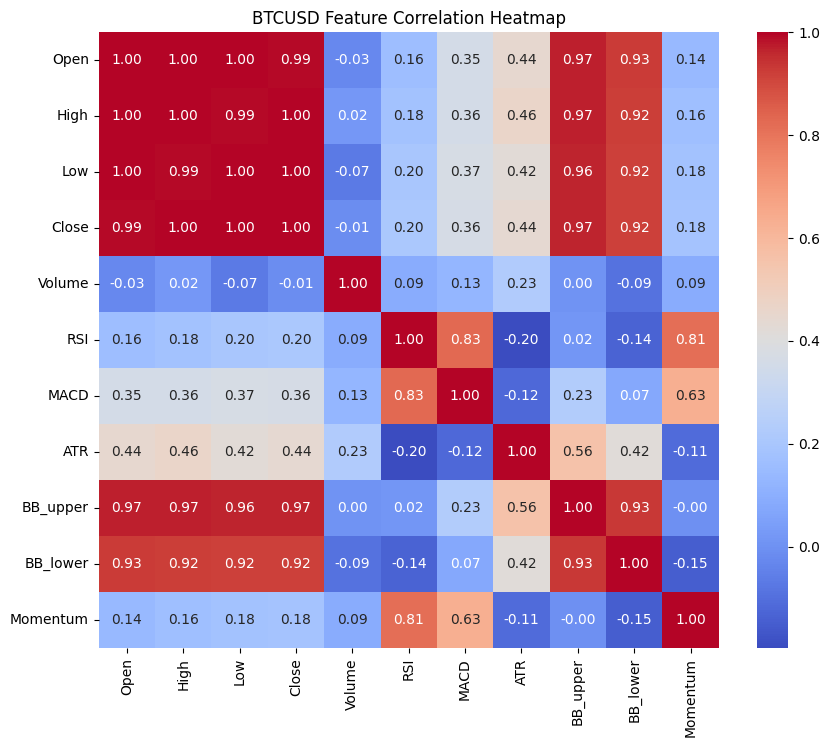

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

for ticker, df in dfs_norm.items():
    # Select only numeric columns for correlation
    numeric_df = df.select_dtypes(include='number')
    plt.figure(figsize=(10,8))
    sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
    plt.title(f'{ticker} Feature Correlation Heatmap')
    plt.show()